The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [53]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data//nobel.csv')
nobel = pd.read_csv('data//nobel.csv')
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


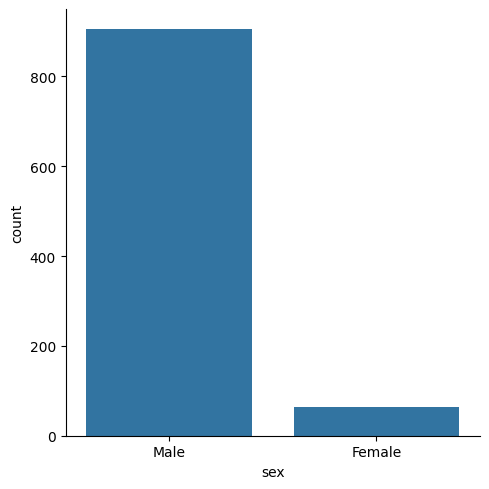

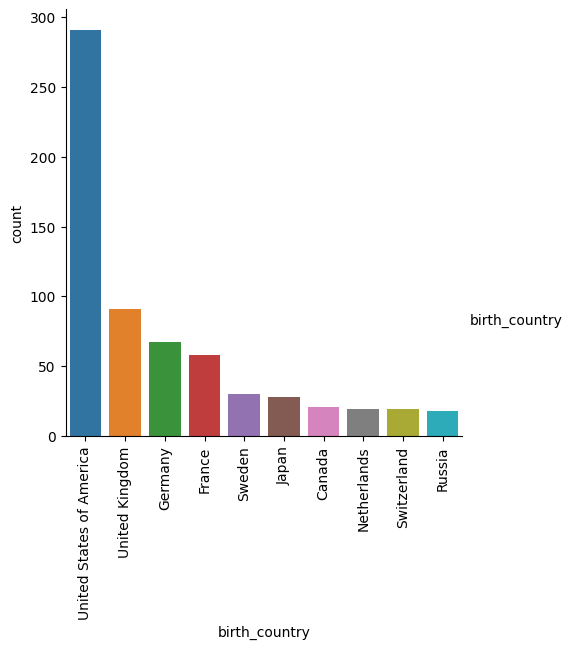

In [54]:
# What is the most commonly awarded gender and birth country?
#1
gender = (df
          .groupby('sex')
          .size()
          .reset_index(name='count'))
top_gender = gender[gender['count'] == gender['count'].max()].iloc[0, 0]

sns.catplot(x='sex',
           data=df,
           kind='count')

#2
top_country_1 = (df
              .groupby('birth_country')
              .size()
              .reset_index(name='count')
              .sort_values('count', ascending=False)
              .head(10))
top_country = top_country_1['birth_country'].iloc[0]

sns.catplot(x='birth_country',
            y='count',
           data=top_country_1,
           kind='bar',
           hue='birth_country')

plt.xticks(rotation=90)

plt.show()

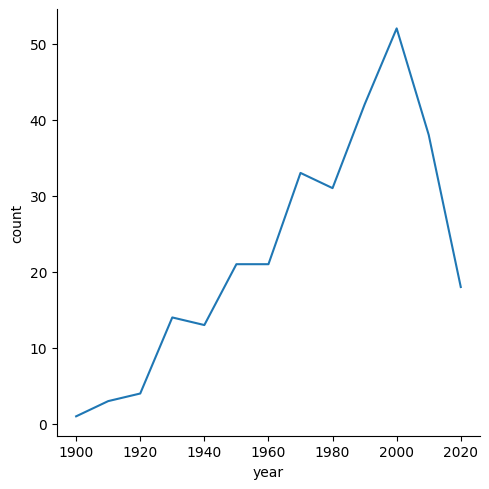

In [55]:
# What decade had the highest proportion of US-born winners
#1
df_usa = (df
          .query("birth_country == 'United States of America'")
          .groupby((df['year'] // 10) * 10)
          .size()
          .reset_index(name='count'))

max_decade = df_usa[df_usa['count'] == df_usa['count'].max()]
max_decade_usa = max_decade.iloc[0, 0]
sns.relplot(x='year',
            y='count',
            data=df_usa,
           kind='line')

In [56]:
# What decade and category pair had the highest proportion of female laureates
#1
df['decade'] = df['year'].apply(lambda x: x//10*10)
df['female_winner'] = (df['sex'] == 'Female')

prop_female_winners = (df
                      .groupby(['decade', 'category'], as_index=False)
                      ['female_winner']
                      .mean())

max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

max_female_dict = {max_female_decade_category.iloc[0, 0]:max_female_decade_category.iloc[0, 1]}
max_female_dict

{2020: 'Literature'}

In [57]:
# Who was the first woman to receive a Nobel Prize, and in what category?
df_l = df[df['sex']=='Female'].sort_values('year')[['full_name', 'category']]
first_woman_name = df_l.iloc[0, 0]
first_woman_category = df_l.iloc[0, 1]

In [58]:
# Which individuals or organizations have won multiple Nobel Prizes throughout the years?
#1
df_1_ = (df
        .groupby('full_name')
        .size()
        .reset_index(name='count')
        .sort_values('count', ascending=False))
df_main = (df_1_
           .query("count>1"))
#2
repeat_list = []
for i in range(len(df_main['full_name'])):
    if df_main['full_name'].iloc[i] not in repeat_list:
        repeat_list.append(df_main['full_name'].iloc[i])
        
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)',
 'Frederick Sanger',
 'Linus Carl Pauling',
 'John Bardeen',
 'Marie Curie, née Sklodowska']